In [2]:
with open('0203.csv', 'r') as f:
    for line in f.readlines():
        #print line.strip()
        pass

In [10]:
import requests
from bs4 import BeautifulSoup as bs
payload= {
'select_item':'1',
'select_subitem':'1',
'Submit':'%B7j%B4M'
}
res = requests.post('http://www.twse.com.tw/ch/listed/listing_profile_inquiry.php', data = payload)
res.encoding = 'big5'
soup = bs(res.text)



In [18]:
import pandas as pd
dfs = pd.read_html(soup.select('.board_prod')[0].prettify('utf-8'), encoding = 'utf-8')
df = dfs[0]
df.columns = df.iloc[1]

In [19]:
df = df.drop([0,1])
df

1,證券代號,證券名稱,3/29 收盤價,3/28 收盤價,漲幅 %
2,1213,大飲,17.95,16.9,6.21
3,5264,F-鎧勝,174,164,6.1
4,1524,耿鼎,7.38,7,5.43
5,2910,統領,24.1,23,4.78
6,3550,聯穎,13.2,12.6,4.76
7,3016,嘉晶,25.6,24.5,4.49
8,2539,櫻花建,29.5,28.35,4.06
9,2387,精元,15.6,15,4
10,2379,瑞昱,87.6,84.7,3.42
11,3504,揚明光,37.7,36.55,3.15


In [20]:
df.head()

1,證券代號,證券名稱,3/29 收盤價,3/28 收盤價,漲幅 %
2,1213,大飲,17.95,16.9,6.21
3,5264,F-鎧勝,174,164,6.1
4,1524,耿鼎,7.38,7,5.43
5,2910,統領,24.1,23,4.78
6,3550,聯穎,13.2,12.6,4.76


In [21]:
df.describe()

1,證券代號,證券名稱,3/29 收盤價,3/28 收盤價,漲幅 %
count,50,50,50,50,50
unique,50,50,50,49,46
top,1465,統一超,54.5,164,1.44
freq,1,1,1,2,2


In [34]:
import sqlite3 as lite
con = lite.connect('stock.sqlite')
df.to_sql('stock', con=con)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  app.launch_new_instance()


In [1]:
import datetime
import os
import pandas

seattle_fire_responses = pandas.read_csv('0203.csv', parse_dates=[
    'Datetime'
], usecols=[
    'Address',
    'Type',
    'Datetime',
    'Latitude',
    'Longitude',
    'Incident Number',
]).dropna()
len(seattle_fire_responses)

C:\Anaconda\lib\site-packages\dateutil\parser.py:428: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif res.tzname and res.tzname in time.tzname:


332

In [2]:
seattle_fire_responses.head()

,Address,Type,Datetime,Latitude,Longitude,Incident Number
0,4th Av N / Mercer St,Aid Response,2014-02-03 23:56:00,47.624564,-122.348877,F140012355
1,2121 8th Av,Aid Response,2014-02-03 23:47:00,47.616647,-122.338160,F140012352
2,747 N 135th St,Aid Response,2014-02-03 23:19:00,47.726864,-122.348012,F140012350
3,3716 Ne 75th St,Medic Response,2014-02-03 23:12:00,47.683046,-122.288274,F140012349
4,1111 3rd Av,Auto Fire Alarm,2014-02-03 23:11:00,47.606410,-122.334739,F140012348


In [9]:
import pandas as pd
df = pd.read_csv('data/gps.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [12]:
#df['city'].value_counts()
df['country'].value_counts()
df['country'].value_counts().head()

Spain             646
Portugal          256
Germany           225
Czech Republic    130
Poland            104
dtype: int64

In [14]:
coordinates = df.as_matrix(columns=['lon', 'lat'])
print type(coordinates)

<type 'numpy.ndarray'>


In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


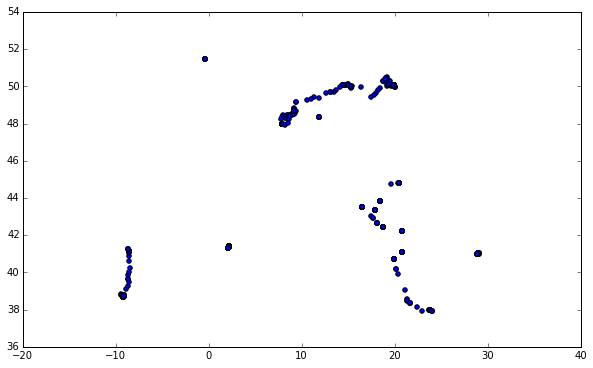

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=100)
co_scatter = plt.scatter(coordinates[:,0], coordinates[:,1])
plt.show()

In [28]:
most_index = df['city'].value_counts().head().index
# list city within most index
most = pd.DataFrame(df[df['city'].isin(most_index)])
# drop duplicate city within index
most.drop_duplicates(subset=['city'], take_last=False, inplace=True)

In [29]:
print most

            lat        lon              date       city         country
7     38.781775  -9.137544  05/14/2014 15:11     Lisbon        Portugal
268   41.377119   2.151632  05/19/2014 00:04  Barcelona           Spain
671   50.087729  14.660600  06/02/2014 12:10     Prague  Czech Republic
805   48.518270   9.058023  06/06/2014 19:06   Tübingen         Germany
1659  40.982352  28.815756  07/06/2014 20:42   Istanbul          Turkey


In [33]:
# lisf top 6 city index
most_index = df['city'].value_counts().head(6).index

# list city within most index
most = pd.DataFrame(df[df['city'].isin(most_index)])

# drop duplicate city within index
most.drop_duplicates(subset=['city'], take_last=False, inplace=True)

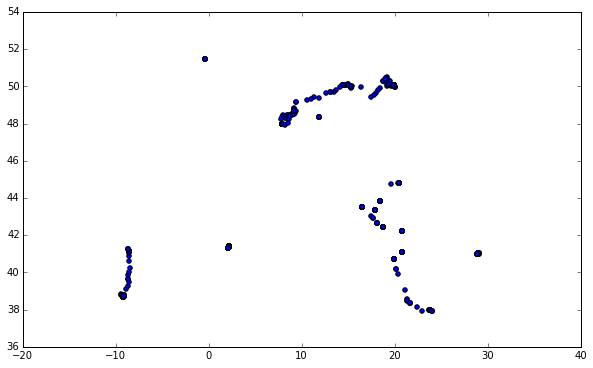

In [34]:
plt.figure(figsize=(10, 6), dpi=100)
co_scatter = plt.scatter(coordinates[:,0], coordinates[:,1])



In [36]:
for i, row in most.iterrows(): 
    print i, row

7 lat                38.78177
lon               -9.137544
date       05/14/2014 15:11
city                 Lisbon
country            Portugal
Name: 7, dtype: object
268 lat                41.37712
lon                2.151632
date       05/19/2014 00:04
city              Barcelona
country               Spain
Name: 268, dtype: object
671 lat                50.08773
lon                 14.6606
date       06/02/2014 12:10
city                 Prague
country      Czech Republic
Name: 671, dtype: object
805 lat                48.51827
lon                9.058023
date       06/06/2014 19:06
city               Tübingen
country             Germany
Name: 805, dtype: object
1588 lat                37.96767
lon                 23.7292
date       07/05/2014 05:32
city                 Athens
country              Greece
Name: 1588, dtype: object
1659 lat                40.98235
lon                28.81576
date       07/06/2014 20:42
city               Istanbul
country              Turkey
Name: 1659, 

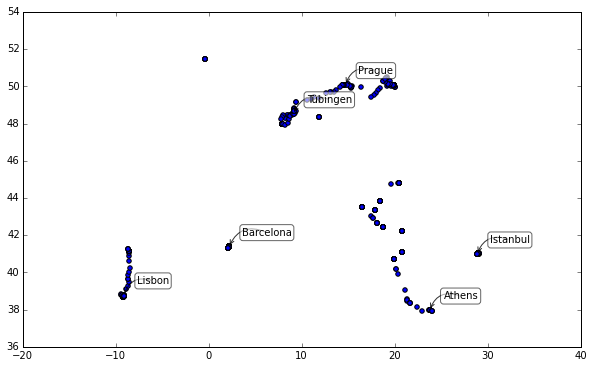

In [38]:
plt.figure(figsize=(10, 6), dpi=100)
co_scatter = plt.scatter(coordinates[:,0], coordinates[:,1])

for i, row in most.iterrows():    
     plt.annotate(row['city'].decode('utf-8'), 
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 1.5, row['lat'] + 0.6),
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.6),
                 xycoords='data',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='k', alpha=0.8))
plt.show()

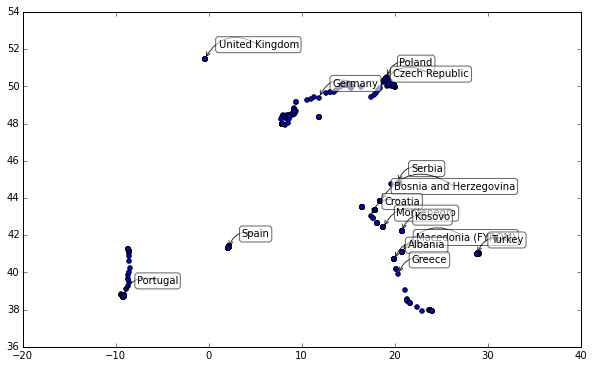

In [39]:
# lisf top 6 city index
most_index = df['country'].value_counts().index

# list city within most index
most = pd.DataFrame(df[df['country'].isin(most_index)])

# drop duplicate city within index
most.drop_duplicates(subset=['country'], take_last=False, inplace=True)

plt.figure(figsize=(10, 6), dpi=100)
co_scatter = plt.scatter(coordinates[:,0], coordinates[:,1])

for i, row in most.iterrows():    
     plt.annotate(row['country'].decode('utf-8'), 
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 1.5, row['lat'] + 0.6),
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.6),
                 xycoords='data',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='k', alpha=0.8))
plt.show()

In [41]:
import numpy as np
from sklearn.cluster import KMeans


# Compute clustering with Means
k_means = KMeans(n_clusters=10)
k_means.fit(coordinates)

k_means_cluster_centers = k_means.cluster_centers_
print k_means_cluster_centers


[[ 23.51629587  38.01096837]
 [  2.15699201  41.38100871]
 [ 19.72823386  50.07119026]
 [ -8.98752764  39.45797003]
 [  8.82884648  48.40155074]
 [ 18.35364969  43.19139728]
 [ 28.97042667  41.02845416]
 [ 14.50884003  50.04236579]
 [ 20.52068845  41.28865261]
 [ -0.44683729  51.47795081]]


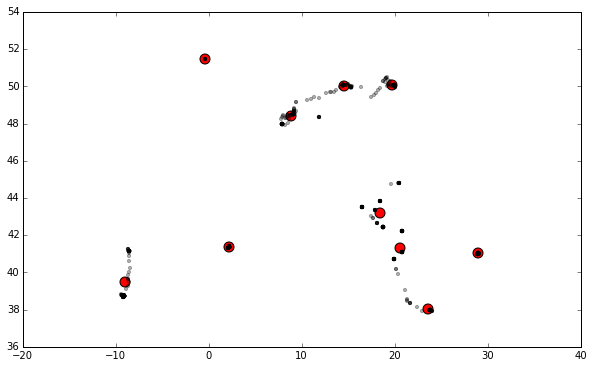

In [46]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(k_means_cluster_centers[:,0], k_means_cluster_centers[:,1], c='r', s=100)
plt.scatter(coordinates[:,0], coordinates[:,1], c='k', alpha=.3, s=10)
plt.show()

In [47]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.8, min_samples=2).fit(coordinates)
labels = db.labels_
print labels


[ 0  0  0 ..., 14 14 14]


In [48]:
num_clusters =   len(set(labels)) - (1 if -1 in labels else 0)
print set(labels)

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, -1])


In [49]:
from sklearn import metrics
print('Estimated number of clusters: %d' % num_clusters)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(coordinates, labels))

Estimated number of clusters: 15
Silhouette Coefficient: 0.901


C:\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [50]:
def getCentroid(points):
    n = points.shape[0]
    sum_lon = np.sum(points[:, 1])
    sum_lat = np.sum(points[:, 0])
    return (sum_lon/n, sum_lat/n)

In [51]:
clusters = pd.Series([coordinates[labels == i] for i in xrange(num_clusters)])
clusters

0     [[-0.4510112, 51.4812916], [-0.4509991, 51.474...
1     [[-9.1375444, 38.7817746], [-9.1291947, 38.774...
2     [[2.1059314, 41.3039111], [2.0755827, 41.29272...
3     [[19.0983815, 50.4893042], [19.0605598, 50.449...
4     [[15.3950116, 50.0418467], [14.99529, 50.12124...
5     [[9.37027094, 49.16301872], [9.3457177, 49.157...
6     [[20.2898206, 44.8211643], [20.463396, 44.8142...
7     [[18.4259447, 43.8595184], [18.4258652, 43.859...
8     [[16.4362152, 43.5111015], [16.434215, 43.5076...
9     [[20.736022, 42.2082015], [20.7361144, 42.2082...
10    [[20.7987999, 41.1143363], [20.7986329, 41.114...
11    [[19.9464309, 40.7021955], [19.9464281, 40.702...
12    [[21.1200769, 39.0400212], [21.26011286, 38.55...
13    [[28.8157561, 40.9823519], [28.8170347, 40.976...
14    [[11.7921547, 48.3564169], [11.7917104, 48.356...
dtype: object

In [57]:
print clusters[0]

def getCentroid(points):
    n = points.shape[0]
    sum_lon = np.sum(points[:, 1])
    sum_lat = np.sum(points[:, 0])
    return (sum_lon/n, sum_lat/n)

getCentroid(clusters[0])

[[ -0.4510112  51.4812916]
 [ -0.4509991  51.474005 ]
 [ -0.446081   51.4781991]
 [ -0.446081   51.4781991]
 [ -0.4515622  51.4741456]
 [ -0.4411027  51.4801463]
 [ -0.4410238  51.479669 ]]


(51.477950814285713, -0.44683728571428577)

In [55]:
for c in clusters:
    print len(c)

7
256
646
109
128
215
15
84
23
30
34
30
81
94
6


In [58]:
clusters = pd.Series([coordinates[labels == i] for i in xrange(num_clusters)])

lat = []
lon = []

for i, cluster in clusters.iteritems():  
    representative_point =getCentroid(cluster)
    lat.append(representative_point[0])
    lon.append(representative_point[1])

In [59]:
lat

[51.477950814285713,
 39.457970034765623,
 41.38100870532508,
 50.071190261284414,
 50.026167333203126,
 48.389913845023251,
 44.811871419999996,
 42.814683774999992,
 43.510389552173912,
 42.208403176666678,
 41.114181535294115,
 40.641590293333337,
 38.023672725679013,
 41.02845416361702,
 48.356280233333337]

In [60]:
lon

[-0.44683728571428577,
 -8.9875276445312497,
 2.1569920091176469,
 19.728233857798166,
 14.410459441796876,
 8.7166680074883729,
 20.392825326666664,
 18.514508229761905,
 16.436269191304348,
 20.737659086666667,
 20.798097426470591,
 19.969341370000002,
 23.48671292148148,
 28.970426670212767,
 11.791802433333332]

In [61]:
zip(lat, lon)

[(51.477950814285713, -0.44683728571428577),
 (39.457970034765623, -8.9875276445312497),
 (41.38100870532508, 2.1569920091176469),
 (50.071190261284414, 19.728233857798166),
 (50.026167333203126, 14.410459441796876),
 (48.389913845023251, 8.7166680074883729),
 (44.811871419999996, 20.392825326666664),
 (42.814683774999992, 18.514508229761905),
 (43.510389552173912, 16.436269191304348),
 (42.208403176666678, 20.737659086666667),
 (41.114181535294115, 20.798097426470591),
 (40.641590293333337, 19.969341370000002),
 (38.023672725679013, 23.48671292148148),
 (41.02845416361702, 28.970426670212767),
 (48.356280233333337, 11.791802433333332)]

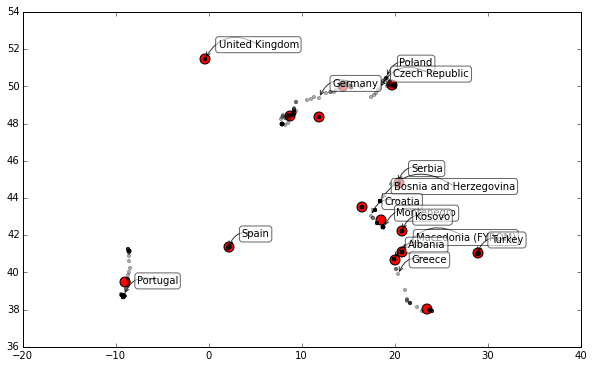

In [65]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(lon, lat, c='r', s=100)
plt.scatter(coordinates[:,0], coordinates[:,1], c='k', alpha=.3, s=10)
for i, row in most.iterrows():    
     plt.annotate(row['country'].decode('utf-8'), 
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 1.5, row['lat'] + 0.6),
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.6),
                 xycoords='data',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='k', alpha=0.8))
plt.show()

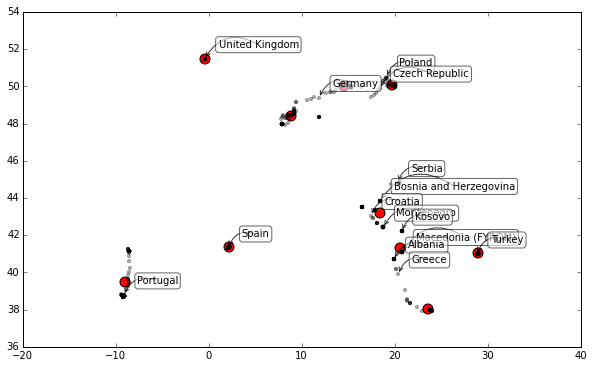

In [66]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(k_means_cluster_centers[:,0], k_means_cluster_centers[:,1], c='r', s=100)
plt.scatter(coordinates[:,0], coordinates[:,1], c='k', alpha=.3, s=10)
for i, row in most.iterrows():    
     plt.annotate(row['country'].decode('utf-8'), 
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 1.5, row['lat'] + 0.6),
                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.6),
                 xycoords='data',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='k', alpha=0.8))
plt.show()

In [162]:
print corpus[0]

新北市 八仙 水上 樂園 昨晚 發 生粉 塵 爆炸 ， 新北市 衛生局 統計 到 目前 為止 ， 由 救護車 送 醫再 加上 自行 送醫 的 人數 ， 已經 有 474 人 ， 其中 125 人 重傷 ； 而 新北市 長 朱立倫 昨晚 到 現場 坐鎮 指揮 了解 狀況 ， 並馬上 要求 追究 責任 徹查 ， 並要 八仙 樂園 立刻 關園 停業 ， 八仙 樂園 業者 雖然 表示 活動 是 外包 的 ， 但 也 說 會 配合 暫時 停止 營業 接受 調查 。 < br   / > < br   / > 警方 今天 凌晨 也 帶 回 五名 相關 人 漏夜 偵訊 ， 包括 現場 呂姓 活動 負責人 、 邱姓 硬體 設備 人員 、 和 廖姓 特效 人員 ， 以及 兩名 在 現場 噴灑 彩色 粉塵 的 2 名 工作 人員 ， 訊後將 依業務 過失 重大 傷害 與 公共 危險 罪嫌 偵辦 ， 統一 移送 士林 地檢署 。 檢警 偵辦 重點 在 於 主辦 單位 辦 這個 活動時 ， 到底 有 沒 有 做好 安全 上 的 防備 ； 據 了解 主辦 人 表示 彩色 派 對 今年 是 第四次 舉辦 ， 去年 也 才 在 高雄 西子 灣辦過 ， 不 知道 為何 這次 會 造成 這麼 嚴重 的 意外 ； 但 警方 對 這樣 的 說法 保留 態度 。 < br   / > < br   / > 而 士林 地檢署 今天 凌晨 也 已經 由 3 名檢察官 ， 連夜 到 八仙 樂園 了解 情況 ， 並 扣押 噴發 氣體 和 粉塵 的 鋼瓶 。 據 了解 ， 檢方 人員到 現場 後 發現 ， 舞台 設在 游泳池 中間 ， 其實 等 於 是 半密閉 空間 ， 而且 地上 四散 菸 蒂 和 打火 機 ， 不 排除 是 有人 不慎 點 菸 引燃 ， 造成 這次 的 意外 。 < br   / > < br   / > 而 外界 關注 昨晚 現場 到底 有 沒 有 在 舞台 上 噴火 ， 據 了解 ， 昨晚 器材 中並 沒有 火焰 效果器 ， 檢警 初步 研判 ， 辦 趴用 的 粉彩 主要 成分 為 玉米粉 ， 在 一定 的 空間 、 一定 的 濃度 ， 遇到 靜電 或 火花 ， 不用 高溫 就 很 容易 引發 閃燃 現象 ，   可能 是 大量 接觸 熱能 ， 像是 舞台 光源 、 器材 電流 、 點 菸 

In [169]:
import jieba.posseg as pseg
for ele, pos in pseg.cut("我爱北京天安门"):
    print pos, ele
print ' '.join([ele for ele, pos in pseg.cut("我爱北京天安门") if pos in ['n', 'ns'] ])

r 我
v 爱
ns 北京
ns 天安门
北京 天安门


In [170]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba
import jieba.posseg as pseg

with open('1435449602.xml', 'r') as f:
    events=ElementTree.fromstring(f.read())

corpus = []
ary= []
for elem in events.findall('./channel/item'):
    guid        = elem.find('guid').text
    title       = elem.find('title').text
    description = elem.find('description').text
    pubDate     = elem.find('pubDate').text
    source      = elem.find('source').text
    ary.append(title)
    corpus.append(' '.join([ele for ele, pos in pseg.cut(description) if pos in ['ns','vn','nr','nt','nz','an','n']] ))


In [171]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()

In [172]:
db = DBSCAN(eps=0.6, min_samples=3,algorithm='brute', metric="cosine")
db_data = db.fit_predict(weight)

In [173]:
print db_data

[ 0  3  1 -1  0 -1 -1 -1 -1 -1 -1  0  1 -1  2 -1  0 -1 -1 -1  2 -1 -1 -1  1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  3 -1  1 -1 -1  3 -1 -1  3 -1
  0  0 -1  0 -1  3  0 -1 -1 -1  2  4 -1  0  1 -1  2  0 -1  2  0  2 -1  0  4
  4  2  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  2  0  0  2 -1]


In [174]:
labels = db.labels_
print labels

[ 0  3  1 -1  0 -1 -1 -1 -1 -1 -1  0  1 -1  2 -1  0 -1 -1 -1  2 -1 -1 -1  1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  3 -1  1 -1 -1  3 -1 -1  3 -1
  0  0 -1  0 -1  3  0 -1 -1 -1  2  4 -1  0  1 -1  2  0 -1  2  0  2 -1  0  4
  4  2  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  2  0  0  2 -1]


In [175]:
num_clusters =   len(set(labels)) - (1 if -1 in labels else 0)
print set(labels)

set([0, 1, 2, 3, 4, -1])


In [181]:
for idx, l in enumerate(db.labels_):
    if l == 1:
        print ary[idx]

希臘國內三分一自動櫃員機現金短缺
歐元區財長拒希臘延長救助計劃
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
希債協議  法國願盡最後斡旋努力
希臘1／3提款機錢被提光
確保銀行穩定 希臘續與ECB緊密合作
希臘態度強硬 歐元區耐心漸失
希臘盼展延債務 歐元區拒絕


In [182]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()

In [185]:
from sklearn.metrics.pairwise import linear_kernel
#print linear_kernel(tfidf[0], tfidf).flatten()
cosine_similarities = linear_kernel(tfidf[0], tfidf).flatten()
print cosine_similarities

[ 1.          0.10093483  0.00758355  0.          0.42773423  0.02451755
  0.19486331  0.          0.          0.00581206  0.02384168  0.18383265
  0.00486899  0.00919249  0.          0.0055901   0.27669117  0.
  0.05308888  0.          0.01679272  0.24639655  0.01742609  0.          0.0062555
  0.40371155  0.00720463  0.01295297  0.03973804  0.01860976  0.
  0.00479975  0.          0.          0.          0.          0.04051555
  0.00341339  0.          0.00305933  0.03243179  0.05083708  0.          0.
  0.01430347  0.          0.00571796  0.00286234  0.00330209  0.00683212
  0.00331356  0.01427637  0.002769    0.00471629  0.00332822  0.00770943
  0.00168146  0.00481331  0.01089011  0.00559877  0.00524669  0.01728479
  0.00554637  0.00866881  0.02642362  0.01242947  0.02176888  0.00337425
  0.01362229  0.          0.00910713  0.0255711   0.00550622  0.00298241
  0.00400042  0.00788701  0.00755019  0.03920336  0.0095726   0.          0.0088191
  0.1714976   0.          0.01596974  0. 

In [194]:
related_docs_indices = cosine_similarities.argsort()[::-1]
related_docs_indices
print ary[0]
for index in related_docs_indices:
    if cosine_similarities[index] > 0.1:
        print ary[index], cosine_similarities[index]


八仙塵爆  五相關人依公共危險重傷害法辦
八仙塵爆  五相關人依公共危險重傷害法辦 1.0
6月28日各報頭版要聞 0.427734225844
八仙樂園粉塵燃爆 400人傷 負責人被移送 0.403711547586
八仙樂園粉塵瞬燃　還原失事現場影片曝光 0.340469466339
八仙樂園爆炸意外 朱立倫：立即停園接受調查 0.308157718314
八仙樂園爆炸228人輕重傷 朱立倫：無限期停業 0.303905967756
【八仙意外】馬英九、毛治國第一時間得知　指示全 0.281041114878
八仙樂園貼出暫停營業海報 0.276691169809
八仙樂園塵爆215傷　朱立倫下令即刻停業 0.262275333546
八仙樂園爆炸 朱立倫4點指示 0.247947732381
八仙樂園爆炸案 專家認玉米粉危險性高應管制使用 0.246396551513
八仙樂園爆炸案 3檢察官展開調查 0.24635458965
彩色派對主辦人：風勢太大，引燃粉塵 0.234703085254
侯友宜探視傷者：追究責任 0.234433640894
【八仙意外】讓專業的來！柯文哲指示啟動EOC 0.224803956208
八仙樂園爆炸案 士檢派3檢察官現場指揮 0.222541322502
派對彩粉首次釀禍  蔣丙煌：研議管理 0.196564449597
八仙樂園舞台大火 逾400人輕重傷 0.194863311466
八仙樂園意外 毛揆取消視察臺東行程 0.183832645598
八仙樂園爆炸案 負責人等5人移送 0.171497595795
八仙樂園火警  國軍加入救援 0.16620506456
八仙水上樂園爆炸逾百人傷　三軍總醫院收治傷患 0.165392336726
八仙樂園意外 洪秀柱：為傷者祈福 0.141242453989
八仙樂園大火  傷者查詢電話 0.138402428704
00：35統計　八仙大火重傷97人、輕傷132人 0.127988746478
八仙樂園爆炸 劣賊趁亂打劫 0.110497152011
八仙樂園意外 病患持續增加中 0.100934833054


In [195]:
# pip install seaborn
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [200]:
n_cosine_similarities = linear_kernel(tfidf[0:10], tfidf[0:10])
print n_cosine_similarities

[[ 1.          0.10093483  0.00758355  0.          0.42773423  0.02451755
   0.19486331  0.          0.          0.00581206]
 [ 0.10093483  1.          0.02261562  0.          0.14269063  0.00590131
   0.24146506  0.          0.          0.        ]
 [ 0.00758355  0.02261562  1.          0.00349887  0.01618184  0.
   0.01420986  0.          0.          0.        ]
 [ 0.          0.          0.00349887  1.          0.01709682  0.00151445
   0.01157983  0.          0.          0.0024299 ]
 [ 0.42773423  0.14269063  0.01618184  0.01709682  1.          0.00222422
   0.23087119  0.          0.          0.00479342]
 [ 0.02451755  0.00590131  0.          0.00151445  0.00222422  1.
   0.01034154  0.00263271  0.          0.        ]
 [ 0.19486331  0.24146506  0.01420986  0.01157983  0.23087119  0.01034154
   1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.00263271
   0.          1.          0.          0.        ]
 [ 0.          0

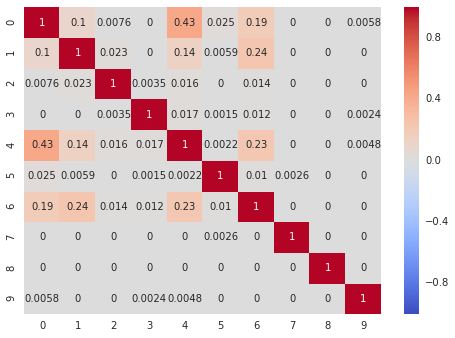

In [201]:
sns.heatmap(n_cosine_similarities, annot=True, center=0, cmap='coolwarm')

In [215]:
import requests
from bs4 import BeautifulSoup as bs
rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = bs(res.text)
payload = {
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'2330',
'btnOK':'查詢'    
}
#'CaptchaControl1':'92D34',
for inp in soup.select('input[type==hidden]'):
    payload[inp['name']] = inp['value']

In [216]:
res2 =  rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data=payload)

In [217]:
res3 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx?v=t')
print res3.text



<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>

</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><link id="ssLayout" rel="stylesheet" type="text/css" href="./BSR_Style.css" /></head>
<body bottommargin="0" leftmargin="0" topmargin="0" rightmargin="0">
    <form method="post" action="bsContent.aspx?v=t" id="form1">
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="/wEPDwUKLTgxNDI2MzM4MGRkOCeVH5iuNhKRRTu7K+3m5A==" />

        <span id="sp_HtmlCode"><html><head></head><body><table border=0 cellpadding=0 cellspacing=0><tr><td align =center>  <table border='0' cellpadding='0' cellspacing='0' width='600px'>     <tr><td align='center'>       <table cellpadding='2' cellspacing='0' border='1' bordercolordark='#FFFFFF' bordercolorlight='#363636' bgcolor='#FFFFFF' width='100%'> 
    <tr>  
     <td class='column_title'> 
          交易日期</td> 
       <td colspan='3' class='column_value' id='receive_date'> 
    2016/03/30</td> 
       <td class=